# Convolutional neural network for image classification

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from keras.models import save_model

## Loading the images

In [2]:
path = 'homer_bart_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

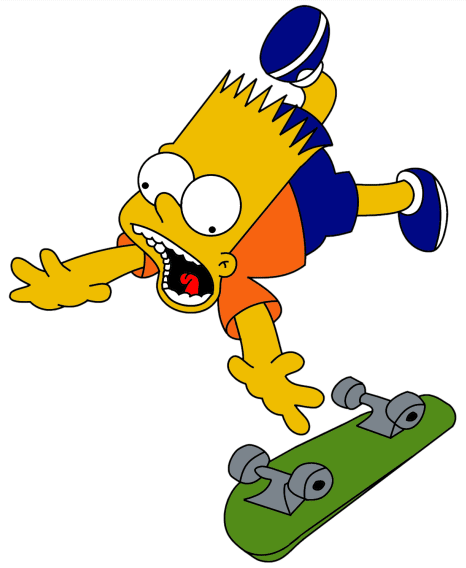

In [3]:
tf.keras.preprocessing.image.load_img('homer_bart_2/training_set/bart/bart120.bmp')

## Train and test set

In [4]:
training_generator = ImageDataGenerator(rescale=1./255,
                                        rotation_range=7,
                                        horizontal_flip=True,
                                        zoom_range=0.2)

In [5]:
train_dataset = training_generator.flow_from_directory('homer_bart_2/training_set',
                                                       target_size=(128, 128),
                                                       batch_size=8,
                                                       class_mode='categorical',
                                                       shuffle=True)

Found 215 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'bart': 0, 'homer': 1}

In [7]:
# To test, we set this parameter to FALSE because when testing, 
# the order of the images makes no difference. 
# If we leave the value equals TRUE, we will not be able to associate the 
# predictions with the expected outputs
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('homer_bart_2/test_set',
                                                       target_size=(128, 128),
                                                       batch_size=1,
                                                       class_mode='categorical',
                                                       shuffle=False)

Found 54 images belonging to 2 classes.


## Building and training the neural network

In [8]:
model = Sequential()
# filters = the numbers of feature detectors.
# kernel_size = The size of feature detector.
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=3137, activation='relu')) # Since the output shape of flatten layer is 6272, the units will be (6272 + 2) / 2 = 3137
model.add(Dense(units=3137, activation='relu'))
model.add(Dense(units=3137, activation='relu'))
model.add(Dense(units=2, activation='softmax')) # Since we use 'categorical' as class_mode, units and activation must be 2 and 'softmax'

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit_generator(train_dataset, epochs=50)

<ipython-input-11-5815fc737adc>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_dataset, epochs=50)


Epoch 1/50
27/27 [==============================] - 41s 1s/step - loss: 1.0248 - accuracy: 0.6140
Epoch 2/50
27/27 [==============================] - 23s 869ms/step - loss: 0.5919 - accuracy: 0.6791
Epoch 3/50
27/27 [==============================] - 23s 846ms/step - loss: 0.5240 - accuracy: 0.7488
Epoch 4/50
27/27 [==============================] - 24s 878ms/step - loss: 0.4979 - accuracy: 0.7953
Epoch 5/50
27/27 [==============================] - 25s 944ms/step - loss: 0.4176 - accuracy: 0.8279
Epoch 6/50
27/27 [==============================] - 24s 883ms/step - loss: 0.4524 - accuracy: 0.7907
Epoch 7/50
27/27 [==============================] - 24s 874ms/step - loss: 0.4229 - accuracy: 0.8186
Epoch 8/50
27/27 [==============================] - 24s 897ms/step - loss: 0.4749 - accuracy: 0.8047
Epoch 9/50
27/27 [==============================] - 24s 885ms/step - loss: 0.3504 - accuracy: 0.8419
Epoch 10/50
27/27 [==============================] - 24s 888ms/step - loss: 0.3970 - accuracy:

## Evaluating the neural network

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

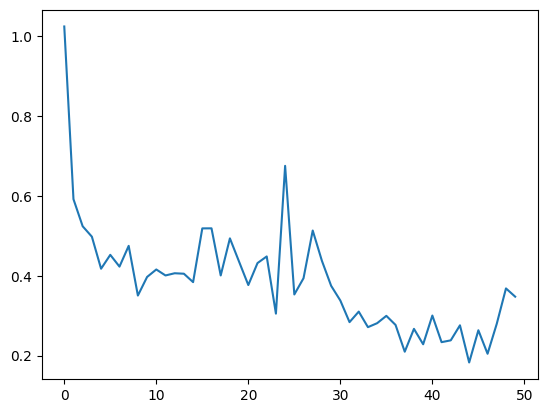

In [13]:
plt.plot(history.history['loss'])

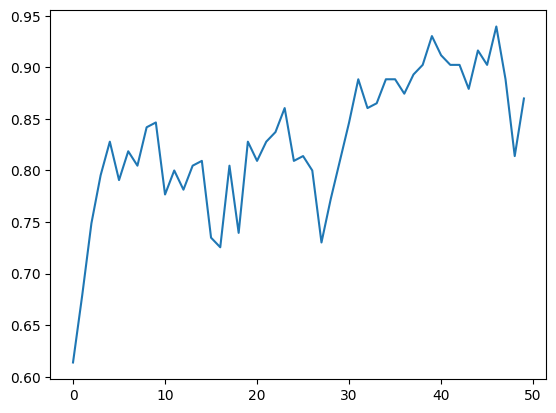

In [14]:
plt.plot(history.history['accuracy'])

In [18]:
predictions = model.predict(test_dataset)
predictions = np.argmax(predictions, axis = 1)
predictions

54/54 [==============================] - 3s 46ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [19]:
accuracy_score(test_dataset.classes, predictions)

0.8703703703703703

<Axes: >

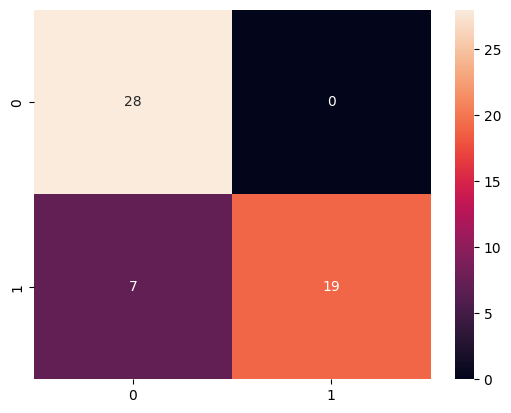

In [20]:
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True)

In [21]:
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        28
           1       1.00      0.73      0.84        26

    accuracy                           0.87        54
   macro avg       0.90      0.87      0.87        54
weighted avg       0.90      0.87      0.87        54



## Saving and loading the model

In [22]:
model_json = model.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

In [23]:
model_saved = save_model(model, '/content/weights.hdf5')

In [24]:
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 128, 128, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 128, 128, 3], "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2]

In [25]:
model_saved = tf.keras.models.model_from_json(json_saved_model)
model_saved.load_weights('weights.hdf5')
model_saved.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [26]:
model_saved.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0

## Classifying one single image

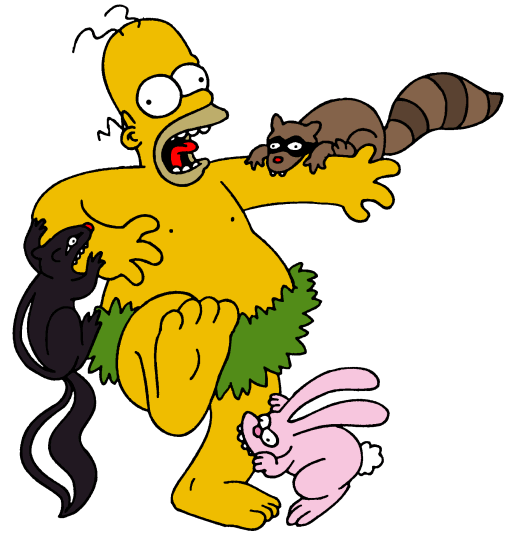

In [27]:
image = cv2.imread('/content/homer_bart_2/test_set/homer/homer15.bmp')
cv2_imshow(image)

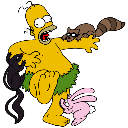

In [28]:
image = cv2.resize(image, (128, 128))
cv2_imshow(image)

In [29]:
image = image.reshape(-1, 128, 128, 3)
image.shape

(1, 128, 128, 3)

In [30]:
result = model_saved(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[1., 0.]], dtype=float32)>

In [31]:
result = np.argmax(result)
result

0

In [32]:
if result == 0:
  print('Bart')
else:
  print('Homer')

Bart
